In [71]:
import nltk, re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download(['names', 'stopwords', 'averaged_perceptron_tagger', 'vader_lexicon', 'punkt', 'state_union'])

[nltk_data] Downloading package names to /home/pi/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /home/pi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/pi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package state_union to /home/pi/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


True

In [52]:
news_sources = ['cnn', 'fox', 'reuters']
search_terms = ['george floyd', 'black lives matter', 'all lives matter']
def load_news_articles():    
    df = pd.DataFrame()
    for each_source in news_sources:
        all_articles = pd.DataFrame()
        for each_term in search_terms:
            label_name = each_term.replace(' ', '-')
            file_name = f'scrappers/articles/{label_name}-posts-{each_source}.json'
            _file = open(file_name, 'r')
            _term_source_df = pd.read_json(_file)
            _term_source_df['search_term'] = each_term
            all_articles = all_articles.append(_term_source_df)
        all_articles['news_source'] = each_source
        df = df.append(all_articles)
    return df


def cleantext(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  regex = re.compile(r'[\n\r\t]')
  cleantext = re.sub(regex, ' ', cleantext)
  return cleantext


In [28]:
df = load_news_articles()
df.headline = df.headline.apply(cleantext)
df.text = df.text.apply(cleantext)
df[df.news_source == 'reuters']

,url,headline,published_date,text,search_term,news_source
0,/article/uk-factcheck-false-george-soros-claim...,Fact check: False claims about George Soros,2020-06-18,By Reuters Staff 17 MIN READ Update September ...,george floyd,reuters
1,/article/idUSKCN24W24M,Portland protesters put out fires as feds with...,2020-07-31,"By Deborah Bloom 4 MIN READ PORTLAND, Ore. (Re...",george floyd,reuters
2,/article/idUSKCN24W2QD,"In Portland, some Black activists frustrated w...",2020-07-31,By Deborah Bloom 4 MIN READ PORTLAND (Reuters)...,george floyd,reuters
3,/article/idUSKCN24W2OK,Fact check: Supreme Court did not allow federa...,2020-07-31,By Reuters Staff 7 MIN READ Posts shared on Fa...,george floyd,reuters
4,/article/idUSL2N2F20XI,"UPDATE 6-Portland has no fires, arrests as fed...",2020-07-31,"By Deborah Bloom 4 MIN READ PORTLAND, Ore. (Re...",george floyd,reuters
...,...,...,...,...,...,...
408,/article/idUSL4N2D837T,"US STOCKS-S&P 500 tops 3,000 on hopes of econo...",2020-05-26,"By Medha Singh, Uday Sampath Kumar 3 MIN READ ...",all lives matter,reuters
409,/article/idUSL4N2D82VK,US STOCKS-Wall St set to surge at open on reco...,2020-05-26,"By Medha Singh, Uday Sampath Kumar 3 MIN READ ...",all lives matter,reuters
410,/article/idUSL8N2CU7KL,SPECIAL REPORT-Bolsonaro brought in his genera...,2020-05-26,"By Stephen Eisenhammer, Gabriel Stargardter 18...",all lives matter,reuters
411,/article/idUSKBN231112,Chicago artist fills pesky potholes with pande...,2020-05-25,By Brendan O’Brien 3 MIN READ Slideshow ( 7 im...,all lives matter,reuters


In [36]:
stop_words = nltk.corpus.stopwords.words("english")
def text_pre_process(text):
    tokenized = nltk.word_tokenize(text.lower())
    words = [w for w in tokenized if w.isalpha()]
    words = [w for w in words if w.lower() not in stop_words]
    return words

    
            
    

In [37]:
df['pre_processed'] = df.text.apply(text_pre_process)
df.head()

,url,headline,published_date,text,search_term,news_source,pre_processed
0,https://www.cnn.com/2020/05/27/us/george-floyd...,This is how loved ones want us to remember Geo...,2020-05-27,(CNN)George Floyd moved to Minnesota for a fre...,george floyd,cnn,"[cnn, george, floyd, moved, minnesota, fresh, ..."
1,https://www.cnn.com/2020/06/16/us/george-floyd...,Somebody used a decal to rename a Minneapolis ...,2020-06-16,(CNN)A Minneapolis park got a name change over...,george floyd,cnn,"[cnn, minneapolis, park, got, name, change, we..."
2,https://www.cnn.com/2020/06/08/us/nascar-georg...,NASCAR legends voice support for George Floyd ...,2020-06-08,(CNN)NASCAR drivers have joined the growing li...,george floyd,cnn,"[cnn, nascar, drivers, joined, growing, list, ..."
3,https://www.cnn.com/2020/06/29/us/george-floyd...,Judge threatens to move George Floyd murder tr...,2020-06-29,(CNN)The former Minneapolis police officer cha...,george floyd,cnn,"[cnn, former, minneapolis, police, officer, ch..."
4,https://www.cnn.com/2020/06/02/us/floyd-maywea...,Boxing champ Floyd Mayweather will pay for Geo...,2020-06-02,(CNN)Boxing champion Floyd Mayweather will pay...,george floyd,cnn,"[cnn, boxing, champion, floyd, mayweather, pay..."


*****************************************
------- News Source cnn -------
*****************************************
Keyword: george floyd -------
Total news article:   (441, 7)
Keyword: black lives matter -------
Total news article:   (227, 7)
Keyword: all lives matter -------
Total news article:   (168, 7)
####################################


*****************************************
------- News Source fox -------
*****************************************
Keyword: george floyd -------
Total news article:   (100, 7)
Keyword: black lives matter -------
Total news article:   (100, 7)
Keyword: all lives matter -------
Total news article:   (99, 7)
####################################


*****************************************
------- News Source reuters -------
*****************************************
Keyword: george floyd -------
Total news article:   (1637, 7)
Keyword: black lives matter -------
Total news article:   (590, 7)
Keyword: all lives matter -------
Total news article:   

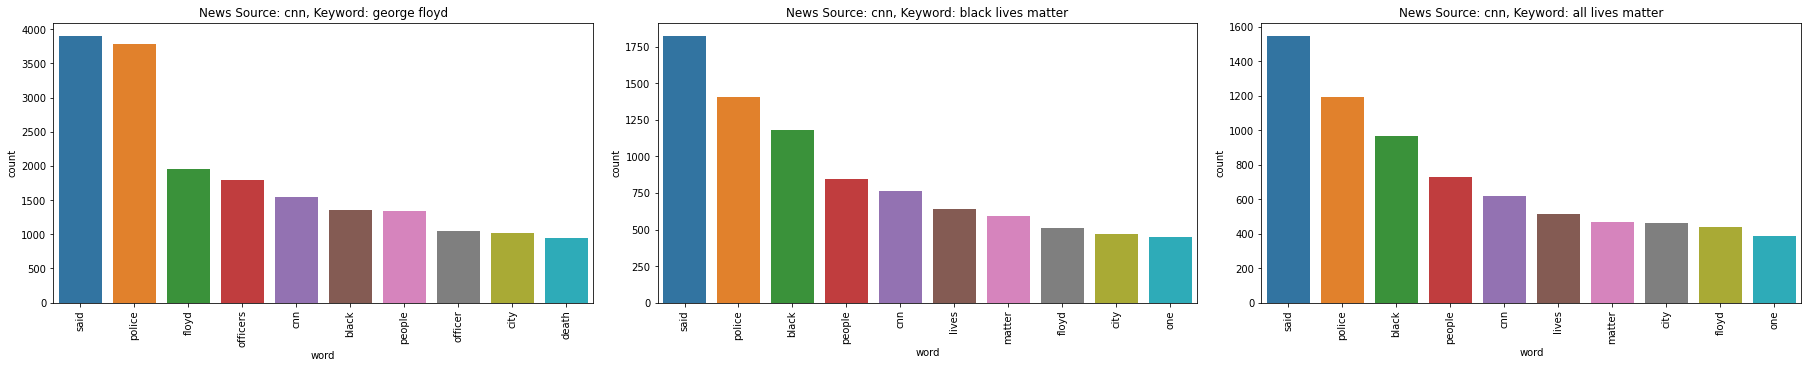

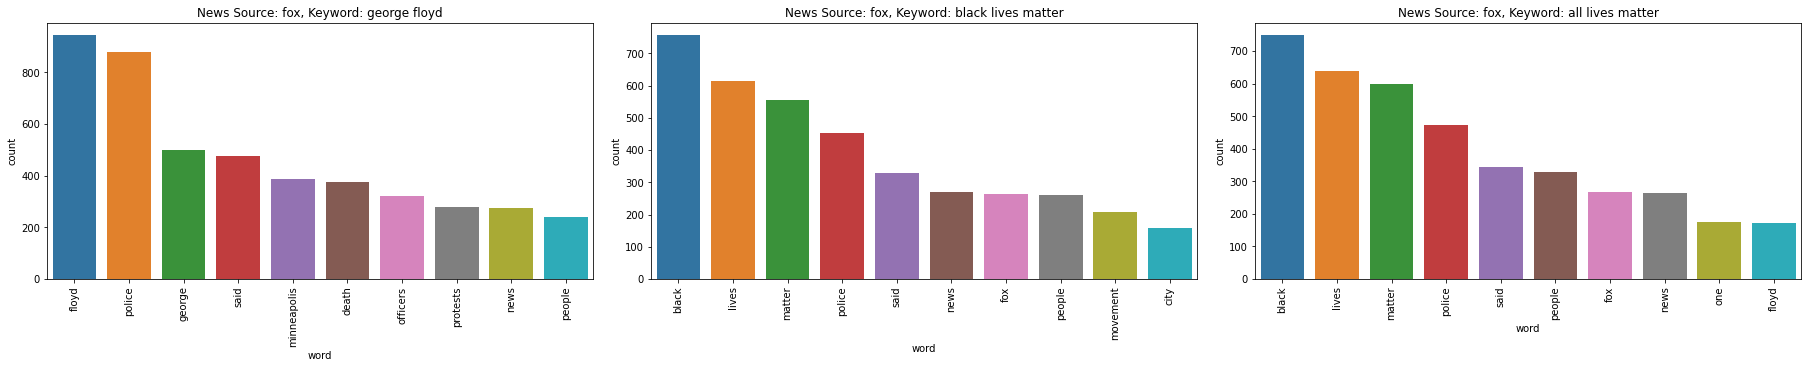

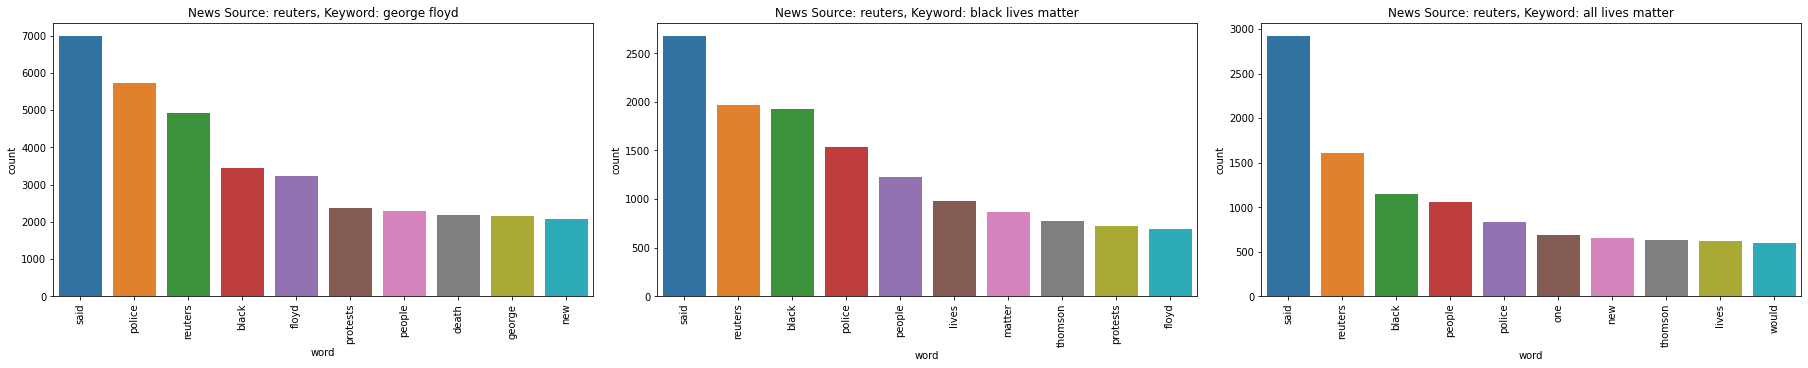

In [88]:
cnn_df = df[df.news_source == 'cnn']
fox_df = df[df.news_source == 'fox']
reuter_df = df[df.news_source == 'reuters']

flatten_list = lambda lst: [each for each_list in lst for each in each_list]
for each_source in news_sources:
    fig, axes = plt.subplots(1, len(search_terms), constrained_layout=True, figsize=(25, 5))
    _source_df = df[df.news_source == each_source]
    print('*****************************************')
    print(f"------- News Source {each_source} -------")
    print('*****************************************')
    for index, each_term in enumerate(search_terms):
        term_df = _source_df[_source_df.search_term == each_term]
        print(f"Keyword: {each_term} -------")
        print("Total news article:  ", term_df.shape)
        _freq_dist = nltk.FreqDist(flatten_list(term_df.pre_processed))
        _common = _freq_dist.most_common(10)
        temp_df = pd.DataFrame(_common, columns=['word', 'count'])
        f = sns.barplot(x='word', y='count', data=temp_df, ax=axes[index])
        axes[index].set_title(f'News Source: {each_source}, Keyword: {each_term}')
        default_labels = f.get_xticklabels()
        axes[index].set_xticklabels(labels=default_labels, rotation=90)
        print('====================================')
    plt.savefig(f'output/common-words {each_source}.jpeg')
    print("####################################\n\n")

    )

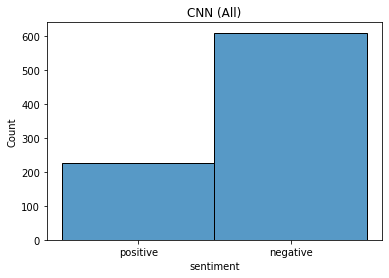

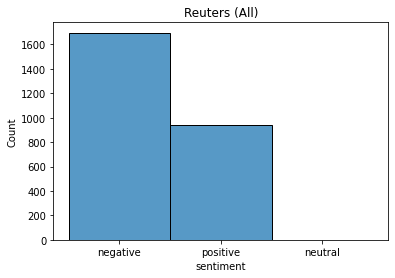

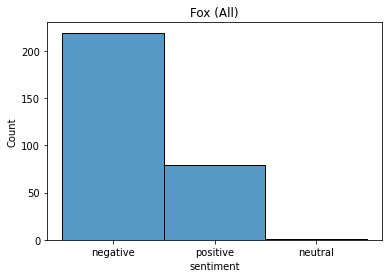

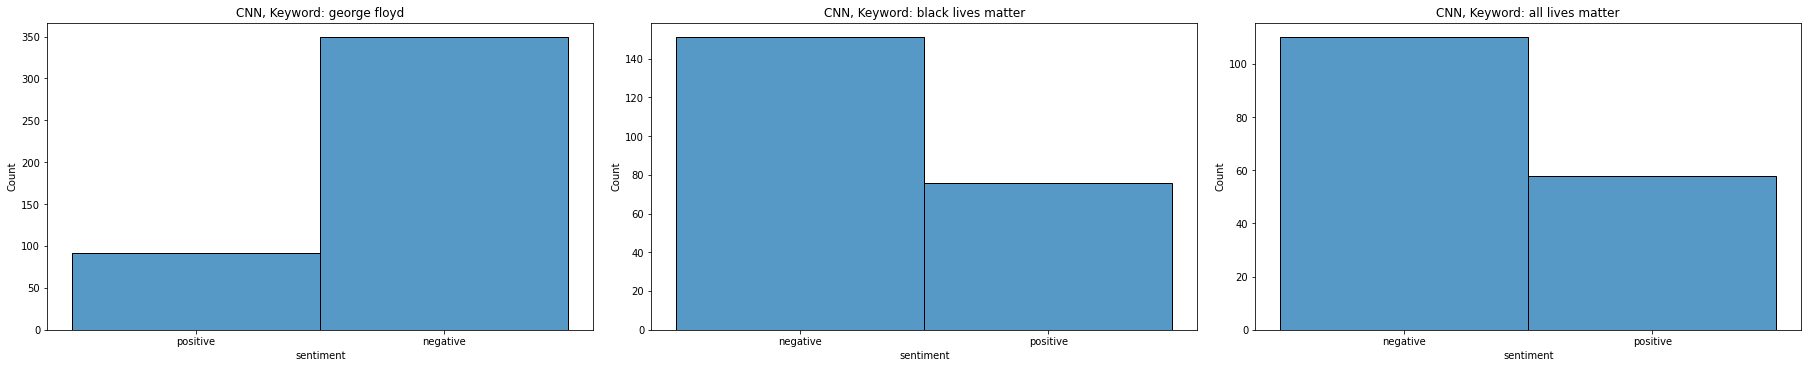

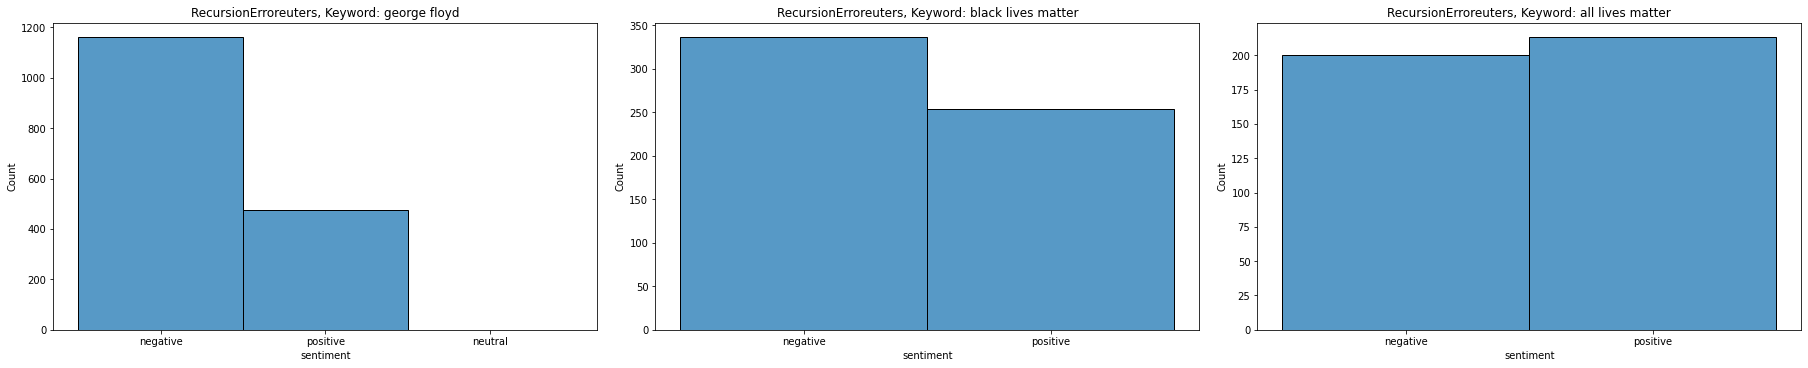

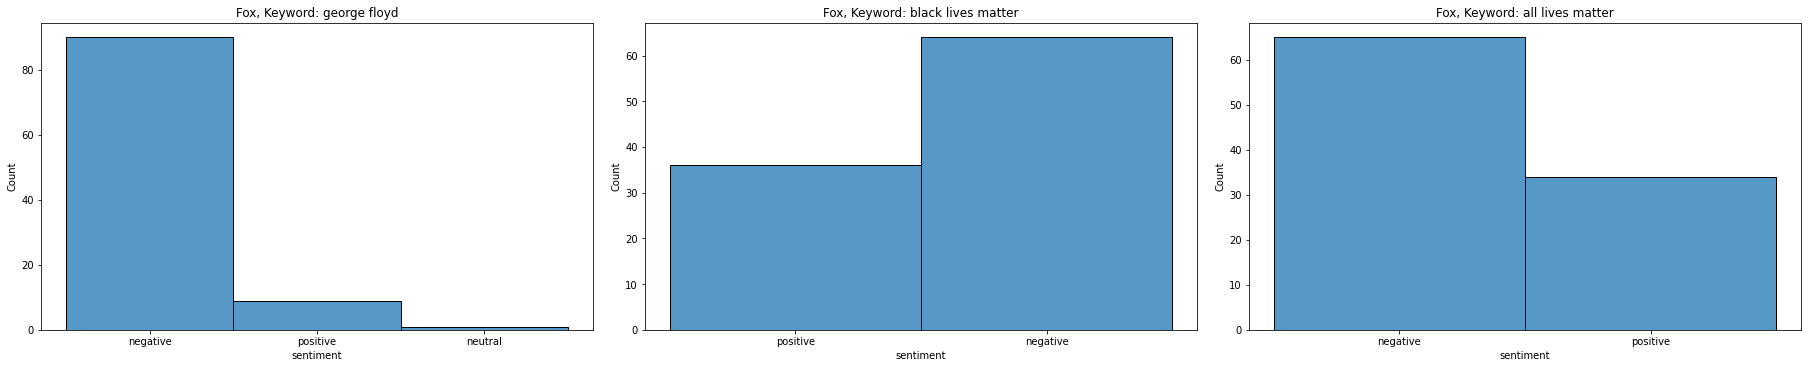

In [260]:
# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment_analysis(text):
    sentiments = analyzer.polarity_scores(text)
#     print(sentiments)
    if sentiments['compound'] < 0:
        return 'negative'
    elif sentiments['compound'] > 0:
        return 'positive'
    elif sentiments['compound'] == 0:
        return 'neutral'
    
cnn_df['sentiment'] = cnn_df.text.apply(sentiment_analysis)
plt.figure()
sns.histplot(cnn_df.sentiment)
plt.title('CNN (All)')
plt.savefig('output/cnn-all-sentiment.jpeg', bbox_inches='tight')

reuter_df['sentiment'] = reuter_df.text.apply(sentiment_analysis)
plt.figure()
sns.histplot(reuter_df.sentiment)
plt.title('Reuters (All)')
plt.savefig('output/reuters-sentiments.jpeg-all-sentiment.jpeg', bbox_inches='tight')

fox_df['sentiment'] = fox_df.text.apply(sentiment_analysis)
plt.figure()
sns.histplot(fox_df.sentiment)
plt.title('Fox (All)')
plt.savefig('output/fox-all-sentiment.jpeg', bbox_inches='tight')

fig_cnn, axes_cnn = plt.subplots(1, len(search_terms), constrained_layout=True, figsize=(25, 5))
fig_reuters, axes_reuters = plt.subplots(1, len(search_terms), constrained_layout=True, figsize=(25, 5))
fig_fox, axes_fox = plt.subplots(1, len(search_terms), constrained_layout=True, figsize=(25, 5))
for index, each_term in enumerate(search_terms):
    cnn = sns.histplot(cnn_df[cnn_df.search_term == each_term].sentiment, ax=axes_cnn[index])
    reuters = sns.histplot(reuter_df[reuter_df.search_term == each_term].sentiment, ax=axes_reuters[index])
    fox = sns.histplot(fox_df[fox_df.search_term == each_term].sentiment, ax=axes_fox[index])
    axes_cnn[index].set_title(f'CNN, Keyword: {each_term}')
    axes_reuters[index].set_title(f'RecursionErroreuters, Keyword: {each_term}')
    axes_fox[index].set_title(f'Fox, Keyword: {each_term}')
fig_cnn.savefig('output/cnn-sentiments.jpeg', bbox_inches='tight')
fig_reuters.savefig('output/reuters-sentiments.jpeg', bbox_inches='tight')
fig_fox.savefig('output/fox-sentiments.jpeg', bbox_inches='tight')

    


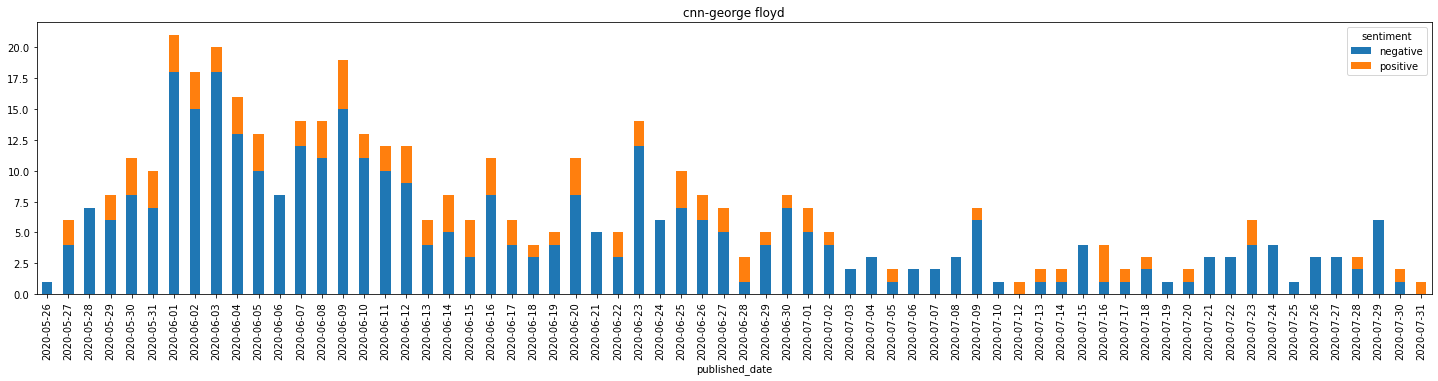

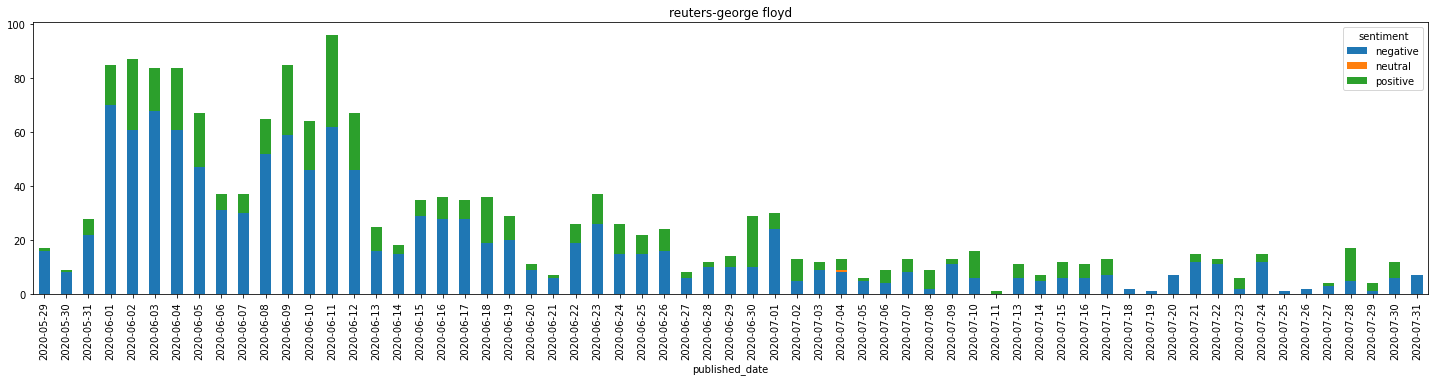

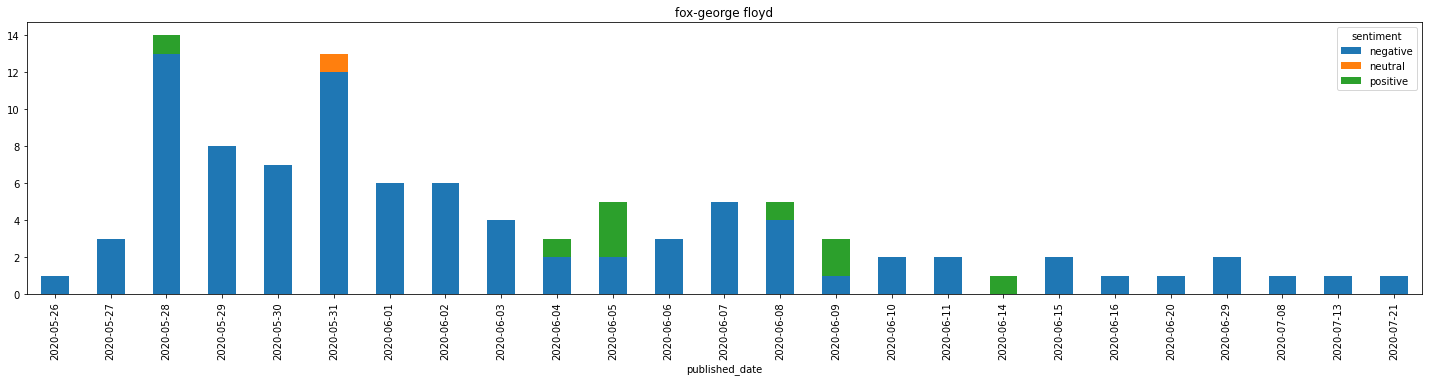

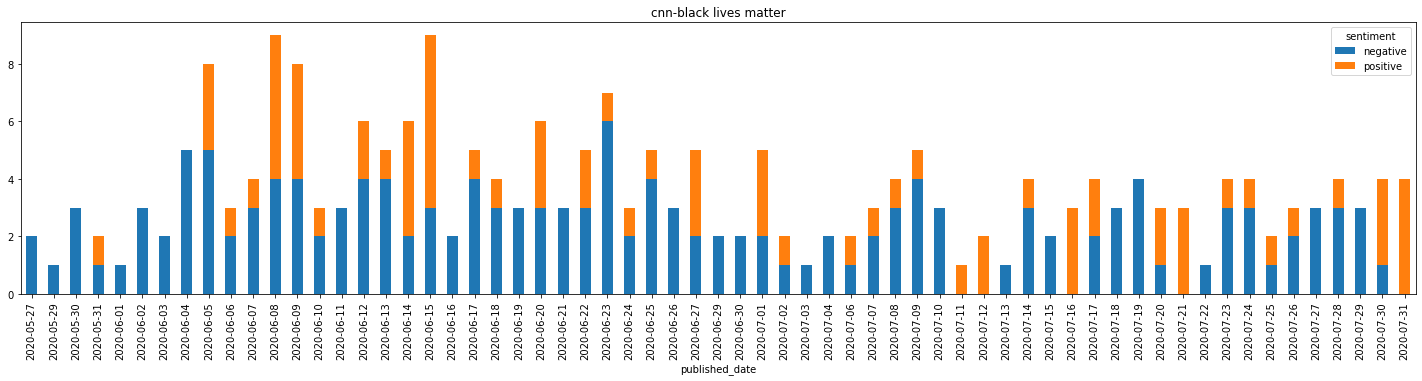

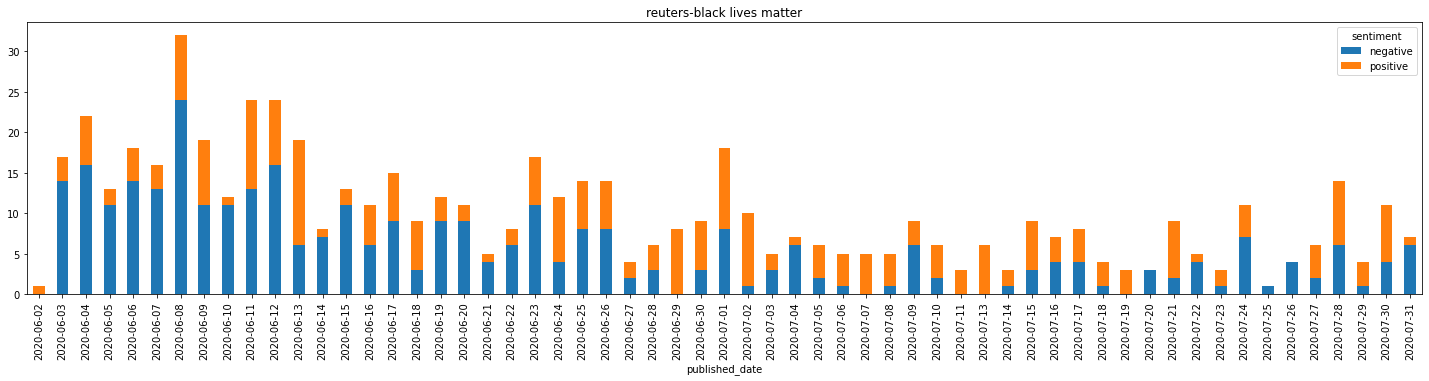

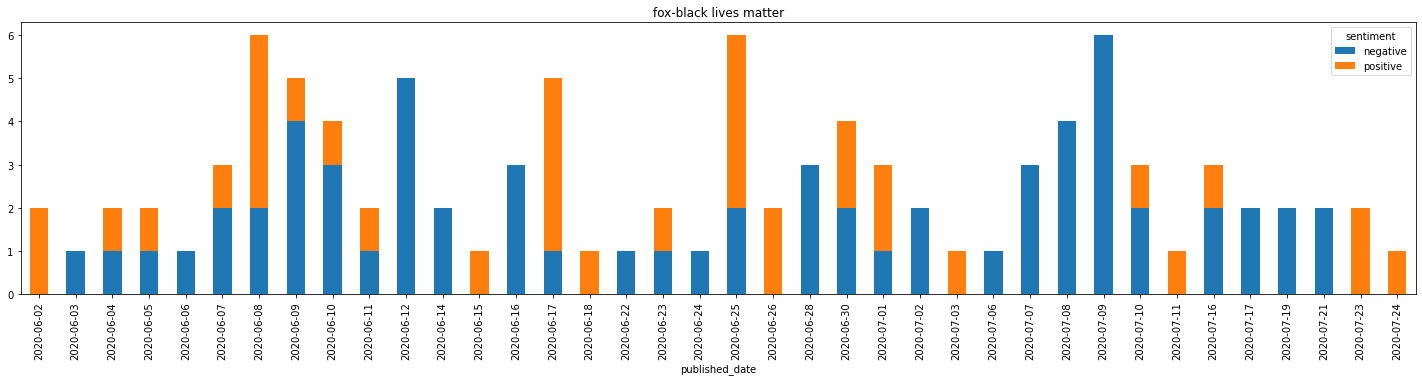

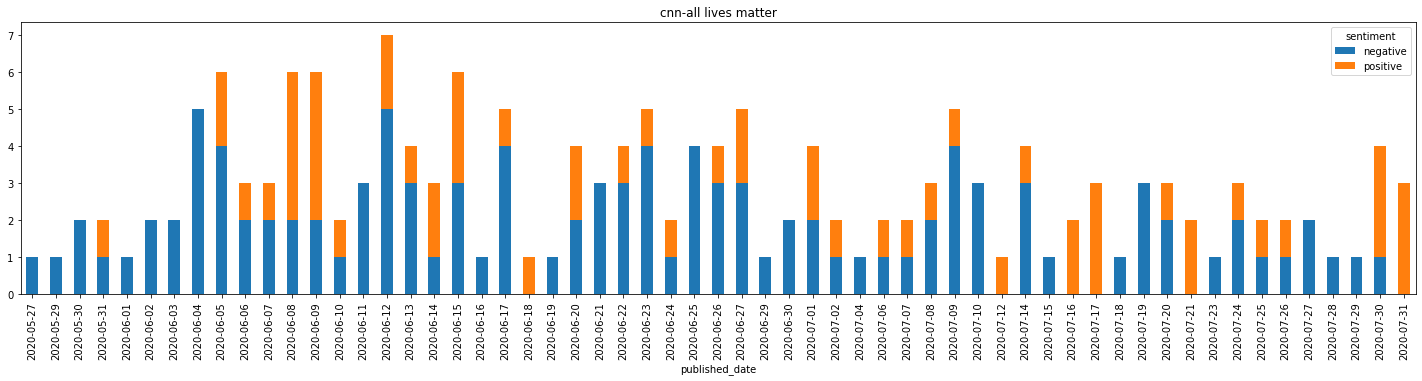

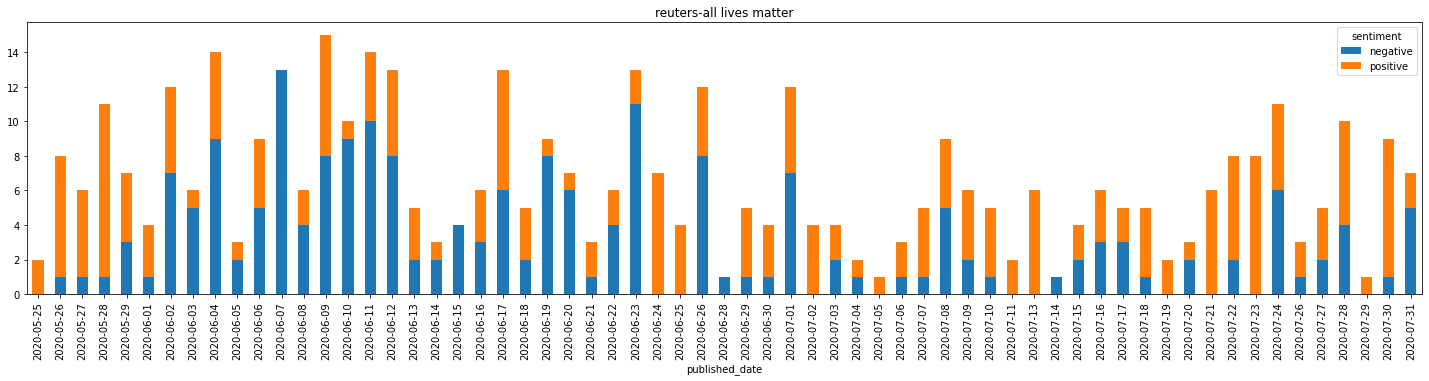

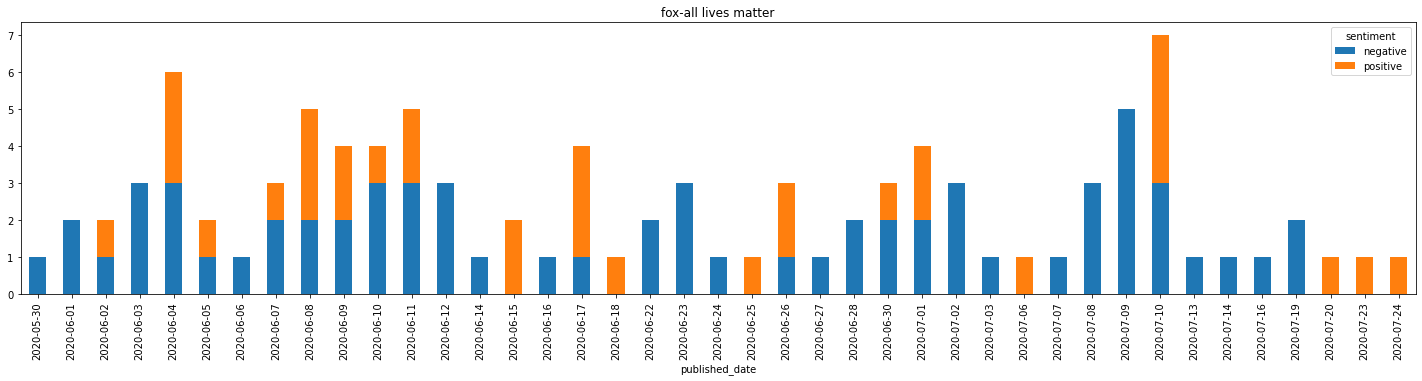

In [223]:
def plot_stacked_bar(temp_df, source, term):
    g = temp_df.groupby(['sentiment', 'published_date']).size().to_frame('count').reset_index()
    p = g.pivot_table('count', index='published_date', columns=['sentiment'])
    p = p.fillna(0)
    fig = p.plot.bar(stacked=True, figsize=(25,5))
    plt.title(f'{source}-{term}')
    plt.savefig(f'output/timeline-{source}-({term}).jpeg', bbox_inches='tight')
    

for each_term in search_terms:
    temp_cnn_df = cnn_df[cnn_df.search_term == each_term]
    temp_reuters_df = reuter_df[reuter_df.search_term == each_term]
    temp_fox_df = fox_df[fox_df.search_term == each_term]
    plot_stacked_bar(temp_cnn_df, 'cnn', each_term)
    plot_stacked_bar(temp_reuters_df, 'reuters', each_term)
    plot_stacked_bar(temp_fox_df, 'fox', each_term)
    




<h1> Positive Articles headline and Body for CNN </h1>

In [234]:
for each_term in search_terms:
    display(f'--------------- CNN - {each_term}----------------')
    for _, each in cnn_df[(cnn_df.search_term == each_term) & (cnn_df.sentiment == 'positive')][:5].iterrows():
        print("Headline: ", each['headline'])
        print('############')
        print("Article: ", each['text'])
        print('############')
        
        
    

'--------------- CNN - george floyd----------------'

Headline:  This is how loved ones want us to remember George Floyd
############
Article:  (CNN)George Floyd moved to Minnesota for a fresh start — an opportunity to better himself and to be a better father. And while so many now know the Houston native by his full name, those who knew him best called him Floyd. He worked security at a restaurant where he developed a reputation as someone who had your back and was there for you when you were down. "Knowing my brother is to love my brother," Philonise Floyd, George's brother, told CNN's Don Lemon. "He's a gentle giant, he don't hurt anybody." Floyd, 46, died May 25 in the city he moved to for a better life, his last moments caught on video. While being arrested, Floyd was held down by a Minneapolis police officer's knee. The video shows Floyd pleading that he is in pain and can't breathe. Then, his eyes shut and the pleas stop. He was pronounced dead shortly after. That officer, Derek Chauvin, was arrested on Friday and first charged wit

'--------------- CNN - black lives matter----------------'

Headline:  Baseball is making Black Lives Matter center stage on Opening Day
############
Article:  (CNN)America's pastime is sending a loud message as it begins its condensed season: Black lives matter. For decades, fans have claimed baseball often mirrors society and in 2020, that rings true -- and loudly. (Photo by Alex Trautwig/MLB Photos via Getty Images) Opening Day should normally bring fans, awakening from winter hibernation, to ballpark grandstands adorned with American flag bunting. Covid-19 means those major league ballparks are largely silent, save for the crack of a bat -- there are no fans in the stands. But Major League Baseball, teams and players are also using this Opening Day to place Black Lives Matters center stage. "BLM," accompanied by the MLB's logo, has been stamped onto the pitcher's mound of the World Series-defending Washington Nationals --and the Los Angeles Dodgers -- on Thursday night. That's the most prominently displayed ballpark location during a televi

'--------------- CNN - all lives matter----------------'

Headline:  Jason Mraz is donating all the earnings from his new album to Black Lives Matter and other groups
############
Article:  (CNN)Jason Mraz is honoring Juneteenth by donating all of the profits from his new album to Black Lives Matter and other organizations working toward equality and justice. The two-time Grammy winner released "Look For The Good" on Friday, the same day that African-Americans celebrate the black community's emancipation from slavery in the United States. "On June 19th, a historic day in the advancement of equality, I am proud to stand in solidarity with and be of service to Black Lives by donating all of my earnings from sales and streams of my new LP recording, Look For The Good," Mraz tweeted. Juneteenth has received increased attention in the wake of nationwide protests against police brutality and racial injustice, sparked by the death of George Floyd at the hands of the police in Minneapolis. The self-proclaimed "Geek in the Pink" will immediately start

<h1> Negative Articles headline and Body for CNN </h1>

In [261]:
for each_term in search_terms:
    display(f'--------------- CNN - {each_term}----------------')
    for _, each in cnn_df[(cnn_df.search_term == each_term) & (cnn_df.sentiment == 'negative')][:5].iterrows():
        print("Headline: ", each['headline'])
        print('############')
        print("Article: ", each['text'])
        print('############')
        
        
    

'--------------- CNN - george floyd----------------'

Headline:  Somebody used a decal to rename a Minneapolis park after George Floyd
############
Article:  (CNN)A Minneapolis park got a name change over the weekend to honor George Floyd. Park officials don't know who put a decal on the sign at George Todd Park to change it to George Floyd Park, but they were impressed by the craftsmanship. The sticker used the same font as the real sign and the color matched almost perfectly. "I do not know who put the decal up but I commend whoever it was for their creativity and detailed work," Minneapolis Park & Recreation Board (MPRB) President Jono Cowgill said in a statement. The park is about 2.5 miles from the spot where George Floyd was killed in police custody. Minneapolis schools and parks cut ties with police over George Floyd's death The decal was put up sometime on Saturday night and officials found out about it the next morning, MPRB spokeswoman Dawn Sommers told CNN. The park board decided to leave the sticker, but a worker removed it Mo

'--------------- CNN - black lives matter----------------'

Headline:  All Lives Matter protesters re-enacted George Floyd's death as a Black Lives Matter march went by
############
Article:  (CNN)A New Jersey corrections officer was suspended and a FedEx worker fired after two All Lives Matter demonstrators mockingly re-enacted George Floyd's death on Monday to apparently counter a Black Lives Matter march in Franklinville, New Jersey. The moment was videotaped by several people from both sides of the protest and posted on social media. "Black lives matter to no one," shouts one apparent All Lives Matter protester. The entire incident lasted one minute and 23 seconds, according to video posted to social media that CNN has obtained. The video appears to have been taken by an All Lives Matter protester and shows what was happening before and after the Black Lives Matter march passed by. Minneapolis Police chief says officers' lack of experience is no excuse in George Floyd killing About 20 seconds before the police cars escorting the Black Lives

'--------------- CNN - all lives matter----------------'

Headline:  All Lives Matter protesters re-enacted George Floyd's death as a Black Lives Matter march went by
############
Article:  (CNN)A New Jersey corrections officer was suspended and a FedEx worker fired after two All Lives Matter demonstrators mockingly re-enacted George Floyd's death on Monday to apparently counter a Black Lives Matter march in Franklinville, New Jersey. The moment was videotaped by several people from both sides of the protest and posted on social media. "Black lives matter to no one," shouts one apparent All Lives Matter protester. The entire incident lasted one minute and 23 seconds, according to video posted to social media that CNN has obtained. The video appears to have been taken by an All Lives Matter protester and shows what was happening before and after the Black Lives Matter march passed by. Minneapolis Police chief says officers' lack of experience is no excuse in George Floyd killing About 20 seconds before the police cars escorting the Black Lives

<h1> Positive Articles headline and Body for Reuters </h1>

In [240]:
for each_term in search_terms:
    display(f'--------------- Reuter - {each_term}----------------')
    temp_df = reuter_df.sample(frac=1)
    for _, each in temp_df[(temp_df.search_term == each_term) & (temp_df.sentiment == 'positive')][:5].iterrows():
        print("Headline: ", each['headline'])
        print('############')
        print("Article: ", each['text'])
        print('############')
        
        
    

'--------------- Reuter - george floyd----------------'

Headline:  Trump strategizes with campaign advisers on re-election amid growing challenges
############
Article:  By Steve Holland 3 MIN READ WASHINGTON (Reuters) - U.S. President Donald Trump met with his top campaign advisers on Thursday, officials said, amid polls showing his tumbling prospects for re-election as the U.S. economy suffers from a global pandemic and protesters gather in cities across the country. FILE PHOTO: U.S. President Donald Trump delivers a statement on the ongoing protests over racial inequality in the wake of the death of George Floyd while in Minneapolis police custody, in the Rose Garden at the White House in Washington, U.S., June 1, 2020. REUTERS/Tom Brenner Trump sat down at the White House with campaign chairman Brad Parscale, White House chief of staff Mark Meadows, senior adviser Jared Kushner, Republican National Committee chair Ronna McDaniel, deputy campaign manager Bill Stepien and pollster Tony Fabrizio, among others. The president had a second, l

'--------------- Reuter - black lives matter----------------'

Headline:  UPDATE 2-Nestle explores sale of Pure Life in overhaul of water business
############
Article:  By Silke Koltrowitz 3 MIN READ ZURICH (Reuters) - Nestle NESN.S is exploring a potential sale of part of its North American water business, including the Pure Life brand, it said on Thursday, as the food giant shifts focus to better performing brands. Slideshow ( 2 images ) The business under review also includes regional spring water brands like Poland Spring and generated sales of 3.4 billion Swiss francs ($3.61 billion) last year, accounting for almost half of total water revenue. Nestle Waters has struggled for years, posting just 0.2% growth last year, prompting an overhaul of the business late last year. “We are withdrawing from a bulk business to focus on high-value (water) specialities,” Nestle Chief Executive Mark Schneider told Reuters by phone. “We can then grow...organically and through acquisitions.” Nestle, known for KitKat chocolate bars and Nescafe coffee, said it 

'--------------- Reuter - all lives matter----------------'

Headline:  Black girls and supporters surf around the world to honor George Floyd
############
Article:  By Lisa Richwine 2 MIN READ LOS ANGELES (Reuters) - From California to Indonesia, Australia and Senegal, black girls and supporters floated on surfboards on Friday to pay tribute to George Floyd, the black man whose death in U.S. police custody has sparked protests worldwide. Slideshow ( 18 images ) The “Solidarity in Surfing” events in more than 100 locations were organized by Black Girls Surf, a group founded in 2014 to teach the sport to girls of color aged 5 to 17. In Santa Monica, California, about 200 surfers of various ages and races gathered under cloudy skies on a stretch of beach once known as Inkwell Beach, a place where black Californians sought an oceanfront refuge in the 20th century. The event was meant to honor Floyd and others who were victims of police brutality, said Sayuri Blondt, 29, a local coordinator for Black Girls Surf. The surfers waded into the water for 

<h1> Negative Articles headline and Body for Reuters </h1>

In [241]:
for each_term in search_terms:
    display(f'--------------- Reuter - {each_term}----------------')
    temp_df = reuter_df.sample(frac=1)
    for _, each in temp_df[(temp_df.search_term == each_term) & (temp_df.sentiment == 'negative')][:5].iterrows():
        print("Headline: ", each['headline'])
        print('############')
        print("Article: ", each['text'])
        print('############')
        
        
    

'--------------- Reuter - george floyd----------------'

Headline:  Attorney General Barr says foreign groups, extremists stoking divisions in U.S. protests
############
Article:  By Sarah N. Lynch, Andy Sullivan 4 MIN READ WASHINGTON (Reuters) - U.S. Attorney General William Barr said on Thursday that foreign interests and “extremist agitators” tied to the Antifa movement have tried to exploit nationwide protests over the latest in a long series of killings of black men by white police officers.  ADVERTISEMENT: Your content will begin in 1 seconds Barr’s statements came three days after an internal intelligence assessment produced by the Department of Homeland Security and seen by Reuters found that most of the violence at the protests appeared to have been carried out by opportunists, not organized extremists. While Barr and Republican President Donald Trump have focused blame on Antifa, a loosely organized anti-fascist movement, federal prosecutors in Las Vegas on Wednesday charged three members of the far-right “Boogaloo” movement with p

'--------------- Reuter - black lives matter----------------'

Headline:  London police to crackdown on illegal parties as officers attacked again
############
Article:  By Michael Holden, Guy Faulconbridge 3 MIN READ LONDON (Reuters) - London police will crackdown on illegal street parties after officers came under attack for the second night running as they tried to disperse an unauthorised gathering, the capital’s police chief said on Friday. As Britain has begun to ease strict coronavirus lockdown rules, police have had to deal with a number of illegal parties and raves across the country with many people flouting guidelines that only groups of up to six can meet outdoors. “It’s hot, some people have drunk far too much, some people are just angry and aggressive, and some are plain violent,” London police chief Cressida Dick said. The events were unlawful and should not be happening, she said, warning: “We will come and close them down.” On Wednesday night, 22 officers were hurt and a number of patrol cars were vandalised when trouble broke out

'--------------- Reuter - all lives matter----------------'

Headline:  UPDATE 4-'No justice, no peace': Tens of thousands in London protest death of Floyd
############
Article:  By Michael Holden, Dylan Martinez 4 MIN READ LONDON (Reuters) - Tens of thousands of people chanting “no justice, no peace, no racist police” marched through central London on Wednesday to protest against racism after the death of George Floyd in Minneapolis.  Floyd, an unarmed black man, died after a white police officer knelt on his neck, an event that has set off the biggest anti-racism protests seen in the United States since the 1960s civil rights era. Demonstrators have also come out in cities around the world in solidarity with Floyd and to express anger over racism. Protesters in London chanted “George Floyd” and “Black Lives Matter” as they marched through the city centre. On Parliament Square, on Trafalgar Square and at other locations, thousands knelt on one knee, a form of protest known as “taking a knee” famously used by American footballer Colin Kaepernick

<h1> Positive Articles headline and Body for Fox </h1>

In [243]:
for each_term in search_terms:
    display(f'--------------- Fox - {each_term}----------------')
    temp_df = fox_df.sample(frac=1)
    for _, each in temp_df[(temp_df.search_term == each_term) & (temp_df.sentiment == 'positive')][:5].iterrows():
        print("Headline: ", each['headline'])
        print('############')
        print("Article: ", each['text'])
        print('############')
        
        
    

'--------------- Fox - george floyd----------------'

Headline:  George Floyd's brother Philonise tells police: 'You can do your job ...
############
Article:  Philonise Floyd on the death of his brother, calls for justice Philonise Floyd, the brother of George Floyd, Benjamin Crump, the lawyer for the Floyd family, and Shareeduh Tate, cousin of George Floyd, join Arthel Neville to discuss the death of George Floyd in the hands of Minneapolis police. George Floyd's brother Philonise spoke out against the growing movement to defund the police on Sunday, telling Fox News' Arthel Neville that officers can do their jobs "and still maintain respect for others." "What I would like is for all police around America to get their jobs and do them the right way, the correct way. Innocent people shouldn't have to die," Philonise Floyd said on "America's News HQ." "You can do your job and still maintain respect for others." Floyd's comments came amid growing calls to weaken law enforcement in the wake of his brother's May 25 death. As violent protests

'--------------- Fox - black lives matter----------------'

Headline:  Southern Baptist president calls for members to declare: 'Black lives ...
############
Article:  Fox News Flash top headlines for June 11 Fox News Flash top headlines are here. Check out what's clicking on Foxnews.com. The leader of the largest Protestant Christian denomination in the country shocked many when he urged his members to declare "black lives matter" and denounced using "all lives matter." J.D. Greear, the president of the Southern Baptist Convention (SBC), made the comments during his annual address delivered on Facebook due to coronavirus orders limiting public gatherings. JOEL OSTEEN CALLS FLOYD’S DEATH ‘TURNING POINT’ FOR HIM "Southern Baptists, we need to say it clearly as a gospel issue: Black lives matter," Greear said. "Of course black lives matter. Our black brothers and sisters are made in the image of God. Black lives matter because Jesus died for them." Southern Baptist Convention President J.D. Greear gave the annual address via Facebook Live due to 

'--------------- Fox - all lives matter----------------'

Headline:  Tucker: Black Lives Matter 'enjoys almost complete immunity from ...
############
Article:  Tucker on the incredible popularity of Black Lives Matter Black Lives Matter may be the single most powerful political party in the United States. Tucker Carlson opened Monday's edition of "Tucker Carlson Tonight" with a discussion of the popularity of the Black Lives Matter movement, describing it as the first political party that cannot be criticized without professional or personal consequences "The media, in their relentlessly fawning coverage, usually describe Black Lives Matter as an activist group or protest movement," the host said. "But that's deception by understatement. Black Lives Matter is not a collection of marchers with signs. It's not a conventional political lobby like Planned Parenthood or the NRA ... It is working to remake the country and then to control it. It's a political party. "As of tonight, Black Lives Matter may be the single most powerful party in the Uni

<h1> Negative Articles headline and Body for Fox </h1>

In [245]:
for each_term in search_terms:
    display(f'--------------- Fox - {each_term}----------------')
    temp_df = fox_df.sample(frac=1)
    for _, each in temp_df[(temp_df.search_term == each_term) & (temp_df.sentiment == 'negative')][:5].iterrows():
        print("Headline: ", each['headline'])
        print('############')
        print("Article: ", each['text'])
        print('############')
        
        
    

'--------------- Fox - george floyd----------------'

Headline:  Sen. Tim Scott: Trump's tweets on George Floyd protests 'not ...
############
Article:  Overwhelming show of force from law enforcement restores measure of order in Minneapolis National Guard soldiers and local officers from surrounding cities bolster police presence in Minneapolis; Garrett Tenney reports. Sen. Tim Scott, R-S.C., said Sunday that he told President Trump that some of his Twitter posts about the violent riots that have rocked the nation in the wake of the death of George Floyd in Minneapolis were “not constructive.” Scott, the only African-American Republican in the Senate, said on “Fox News Sunday” that he spoke with President Trump about his controversial tweets following nights of unrest in Minneapolis – and other American cities – and that the president was responsive to his suggestions. “Those are not constructive tweets, without any question,” Scott said. “I'm thankful that we can have the conversation. We don't always agree on any of his tweets beforeha

'--------------- Fox - black lives matter----------------'

Headline:  Black Lives Matter plans armed 'peace officers' in war on police, NY ...
############
Article:  Protesters take part in a demonstration in Southampton, England, Wednesday, June 3, 2020, over the death of George Floyd, a black man who died after being restrained by Minneapolis police officers on May 25. (Andrew Matthews/PA via AP) The Black Lives Matter movement will develop an armed branch of “peace officers” to combat police brutality in black communities during the so-called war on police, according to one of its leaders. Protests broke out across the country following the death of unarmed Minneapolis black man George Floyd while in police custody, bringing the BLM movement back into national focus. In an interview with the Daily Mail, BLM New York chapter Chairman Hawk Newsome described how the group plans to follow in the footsteps of the Black Panthers Party by matching fire with fire – when necessary. MINNEAPOLIS OFFICER'S MURDER CHARGE EXPECTED TO BE UPGRADED IN GEORG

'--------------- Fox - all lives matter----------------'

Headline:  Pink slams Trump supporters, says president doesn't 'represent half ...
############
Article:  Fox News Flash top entertainment headlines for June 3 Fox News Flash top entertainment and celebrity headlines are here. Check out what's clicking today in entertainment. Pink is posing a question. Since last week, the singer has been very vocal in her support of the Black Lives Matter movement, sharing several posts to Instagram sporting the hashtag and encouraging donations. On Wednesday, the "So What" singer, 40, again addressed her beliefs in a video she shared on Twitter. LIZZO, JOHN LEGEND, JANE FONDA AND MORE CELEBS SIGN 'OPEN DEMAND' LETTER TO DEFUND THE POLICE "How can anyone call themselves a patriot or an American if you re-elect a president that doesn't govern, respect or represent half of our country?" she said, referring to supporters of President Trump. "That's not America. That's your America. That's not America." Pink went on to say that some "worship the confedera

In [256]:
reuter_df.shape

(2640, 8)

In [257]:
len(reuter_df.headline.unique())

1756